In [60]:
import numpy as np
import random
import torch
import torch.nn as nn
import gymnasium as gym
import time
from tqdm import tqdm
import winsound
from torch.distributions import Normal, Categorical
from copy import deepcopy

from stable_baselines3 import A2C

from Orientation3D import *
from PPO import *

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns

from IPython.display import display, clear_output

sns.set_theme()

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 6.0)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3D Ориентация, PPO

## II. Управление с полной обратной связью

### Обучение

In [102]:
env = Orientation3D(dt=1e-2)

agent = PPO(
    state_dim=4, 
    action_dim=3, 
    max_action=200, 
    observable_states=[0, 1],
    gamma=1,
)

# agent = A2C(policy='MlpPolicy', env=env)

# agent.pi_model = torch.load('models/orientation3D_pi_0.pth')
# agent.v_model = torch.load('models/orientation3D_v_0.pth')

In [103]:
train_ppo(
    env, 
    agent, 
    episode_n=100, 
    trajectory_n=100, 
    advantage='default'
)

0: mean reward = -12514.378668720998
1: mean reward = -6924.767802473327
2: mean reward = -4626.747920860061
3: mean reward = -3058.1315849960524
4: mean reward = -1942.3017905188594
5: mean reward = -1255.9349795742053
6: mean reward = -708.8456826187025
7: mean reward = -556.930715474357
8: mean reward = -456.78736104639415
9: mean reward = -409.2181783922963
10: mean reward = -388.8376880603948
11: mean reward = -367.25797404426413
12: mean reward = -348.8564852763959
13: mean reward = -337.14368929899223
14: mean reward = -326.16240012615435
15: mean reward = -318.1007219264716
16: mean reward = -304.89762392387877
17: mean reward = -294.9539266225855
18: mean reward = -286.53256507427074
19: mean reward = -284.7786397822718
20: mean reward = -281.6765612261035
21: mean reward = -276.7912175676067
22: mean reward = -272.91356567971263
23: mean reward = -272.886374810664
24: mean reward = -266.086154869757
25: mean reward = -260.7080561329383
26: mean reward = -260.94690273961663
27

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


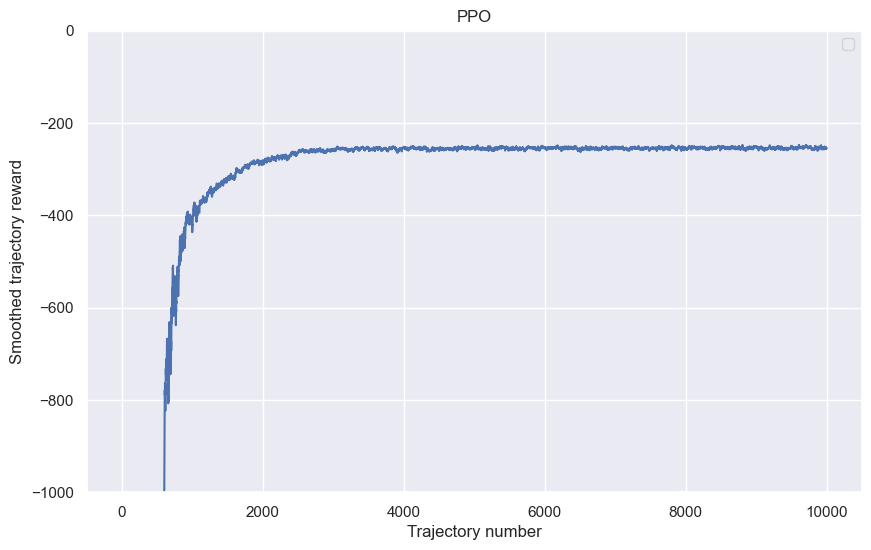

In [105]:
plot_history(agent.history, ylim=-10**3)

### Валидация

In [65]:
validation_env = Orientation3D(dt=1e-3, integration='Euler')

In [148]:
validation(validation_env, agent, validation_n=10, prediction=True)

-168.3306403126145

### Управление:

In [132]:
def get_reward(env, agent):
    traj = agent.get_trajectory(env, prediction=True, initial_state=[0, 24, 16, 16])
    return sum(traj['rewards'])

In [139]:
get_reward(env, agent)

-171.09662803993447

In [138]:
get_reward(validation_env, agent)

-168.36957754919726

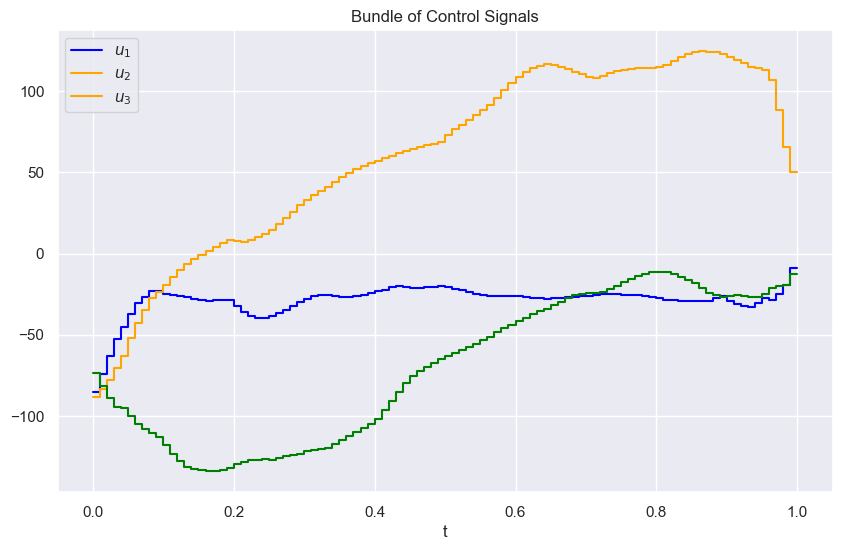

In [143]:
plot_u(env, agent, initial_state=[0, 24, 16, 16])

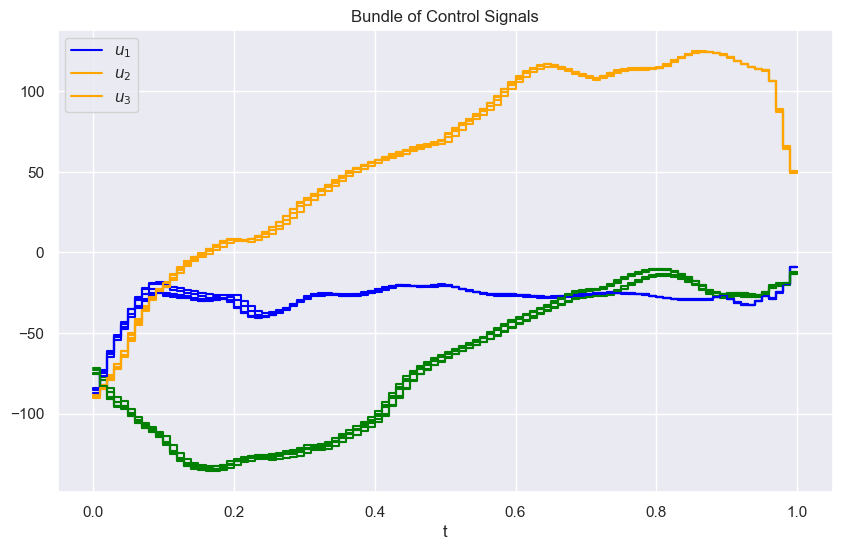

In [142]:
plot_u(env, agent, n=5)

-0.02195044358570665 -0.12502103051146557 -0.05824759649817932


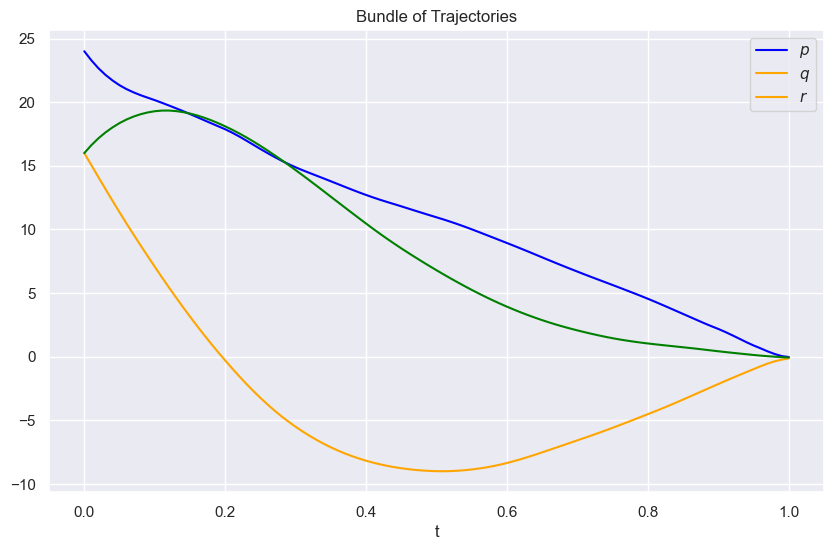

In [145]:
plot_x(env, agent, initial_state=[0, 24, 16, 16])

-0.02191423482248027 -0.1250485547925881 -0.0630153737283885
-0.021595388765708892 -0.1268659301251568 -0.05854581711410789
-0.022289025492554196 -0.12322365112558498 -0.05910812803161578
-0.022184822829357922 -0.12381612224875167 -0.05776077052048089
-0.02157935693328074 -0.12696197916519394 -0.05822461426019908


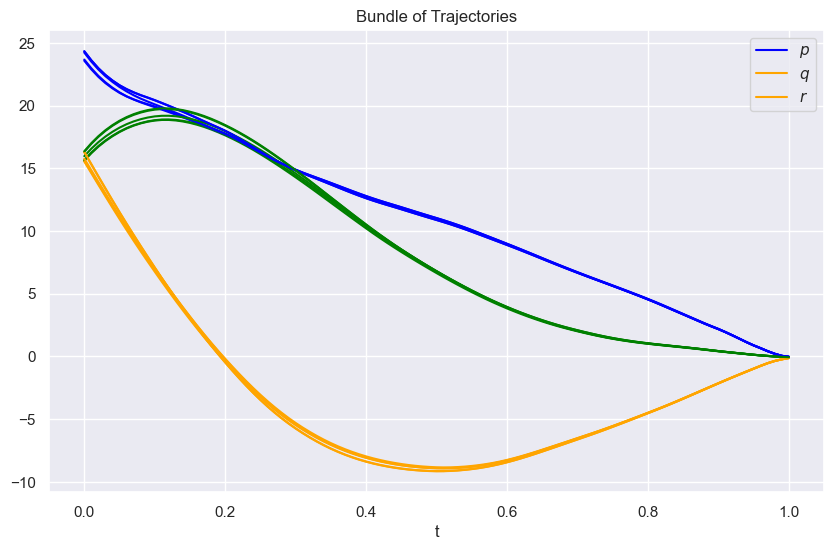

In [146]:
plot_x(env, agent, n=5)

In [129]:
torch.save(agent.pi_model, 'models/orientation3D_pi_170_new.pth')
torch.save(agent.v_model, 'models/orientation3D_v_170_new.pth')